In [ ]:
import csv
import cv2
import pytesseract
from pytesseract import image_to_string
import pandas as pd
import re
import os
import numpy as np
from moviepy.video.io.VideoFileClip import VideoFileClip
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
%run helper-extractingVideos.ipynb

In [ ]:
def extract_from_video(filePath,videoName,template,templateRes):
        # Open the video using OpenCV

    desired_width = 1631
    desired_height = 907
    cap = cv2.VideoCapture(filePath)
    #,apiPreference=cv2.CAP_ANY,params=[
    #cv2.CAP_PROP_FRAME_WIDTH,desired_width ,
    #cv2.CAP_PROP_FRAME_HEIGHT, desired_height])

    #cap.set(cv2.CAP_PROP_FRAME_WIDTH, desired_width)
    #cap.set(cv2.CAP_PROP_FRAME_HEIGHT, desired_height)
    fps=cap.get(cv2.CAP_PROP_FPS)
    print(fps)
    minToSkip=11
    framesToSkip=fps*60*minToSkip
    framesToSkipEverySec=fps-1
    currentFrame=0
    currentFrameInSec=0
    jumpStarted=False
    sno=1
    row={}#changed

    # Initialize a list to store the scores

    print("start")

    oldText="old"
    # Process each frame of the video
    while True:
        # Read the next frame
        ret, frame = cap.read()
        currentFrame+=1
        currentFrameInSec+=1
        if currentFrame<framesToSkip :
            if currentFrame%(fps*60)==0:
                print(currentFrame//(fps*60) ," min(s) Skipped")
            continue
        if currentFrame//(fps*60)<minToSkip:
            continue
        if currentFrameInSec<framesToSkipEverySec:
            continue



        # Break the loop if the video has ended
        if not ret:
            print("completed")
            break

        current_pos = cap.get(cv2.CAP_PROP_POS_MSEC)
        total_seconds = int(current_pos // 1000)
        minutes = total_seconds // 60
        seconds = total_seconds % 60
        timeInVideo =f"{minutes} minutes and {seconds} seconds"
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Use OCR to extract the text from the frame
        text = image_to_string(gray,lang="eng")

        words = text.lower().split()  # split the text into a list of words
        filtered_words = [word for word in words if (word != 'olympic' and word != 'olympic' and word!='2020' and word!='202' and word!='tokyo' and word!='tokyo2020' and word!="tok" and word!="toky") ]  # use list comprehension to remove the word "hello"
        text = ' '.join(filtered_words)  # join the remaining words back into a string
        #if(text!=None):
        #    print(text)
        name=""
        round=""
        country=""
        difficulty=""
        divePosition=""
        somersaults=""
        diveGroup=""
        twists=""


        if not jumpStarted and "attempt" in text.lower():
            jumpStarted=True
            cropped=extract_frame(frame,template)
            plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
            row['Time'] = timeInVideo
            print(timeInVideo," jump started")
            if 'Time' in row:  # Check if 'Time' key exists in row
                # Extract minutes and seconds from time duration string
                time_str = row['Time']
                minutes_str, seconds_str = re.match(r'(\d+) minutes and (\d+) seconds', time_str).groups()
                # Convert minutes and seconds to integers
                minutes = int(minutes_str)
                seconds = int(seconds_str)
                # Calculate total seconds
                totalSeconds = minutes * 60 + seconds

        if jumpStarted and "attempt" not in text.lower() and "1.84" in text.lower():
            print(timeInVideo," jump scores announced")
            cropped=extract_frame(frame,templateRes)
            plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
            extract_clip(filePath,'ExtractedVideos/'+str(sno)+'_'+videoName+'.mp4',totalSeconds,int(total_seconds))
            jumpStarted=False
            sno+=1
            #print(text)
            print(row)
            #save_data(row,"scores")



        currentFrameInSec=0
    cap.release()

29.97002997002997
start
11 minutes and 12 seconds  jump started
11 minutes and 33 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/1_Women's_High_Jump_Final_Tokyo_Replays.mp4
672
693


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:18:14<00:00, 4694.02s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:16:33<113:33:41, 2296.75s/it, now=None]

Moviepy - Building video ExtractedVideos/1_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 1_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                             | 0/464 [00:00<?, ?it/s, now=None]

chunk:   0%|▌                                                                                                                    | 2/464 [00:00<00:35, 12.92it/s, now=None]

chunk:  20%|███████████████████████▌                                                                                           | 95/464 [00:00<00:00, 451.35it/s, now=None]

chunk:  41%|██████████████████████████████████████████████▍                                                                   | 189/464 [00:00<00:00, 648.24it/s, now=None]

chunk:  62%|██████████████████████████████████████████████████████████████████████▎                                           | 286/464 [00:00<00:00, 765.46it/s, now=None]

chunk:  83%|██████████████████████████████████████████████████████████████████████████████████████████████▌                   | 385/4

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/1_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                 | 0/630 [00:00<?, ?it/s, now=None]

t:   1%|█▏                                                                                                                       | 6/630 [00:00<00:10, 59.79it/s, now=None]

t:   3%|███▊                                                                                                                   | 20/630 [00:00<00:05, 106.47it/s, now=None]

t:   5%|██████▏                                                                                                                | 33/630 [00:00<00:05, 116.88it/s, now=None]

t:   7%|████████▉                                                                                                              | 47/630 [00:00<00:04, 124.00it/s, now=None]

t:  10%|███████████▍                                                                                                            | 60/

Moviepy - Done !
Moviepy - video ready ExtractedVideos/1_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '11 minutes and 12 seconds'}
11 minutes and 49 seconds  jump started
12 minutes and 26 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/2_Women's_High_Jump_Final_Tokyo_Replays.mp4
709
746


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:19:11<00:00, 4751.69s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:17:31<114:59:14, 2325.58s/it, now=None]

Moviepy - Building video ExtractedVideos/2_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 2_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                             | 0/816 [00:00<?, ?it/s, now=None]

chunk:   0%|▎                                                                                                                    | 2/816 [00:00<01:00, 13.44it/s, now=None]

chunk:   7%|████████▍                                                                                                          | 60/816 [00:00<00:02, 290.86it/s, now=None]

chunk:  20%|██████████████████████▉                                                                                           | 164/816 [00:00<00:01, 597.55it/s, now=None]

chunk:  32%|████████████████████████████████████                                                                              | 258/816 [00:00<00:00, 721.73it/s, now=None]

chunk:  47%|█████████████████████████████████████████████████████▊                                                            | 385/8

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/2_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                | 0/1109 [00:00<?, ?it/s, now=None]

t:   1%|▉                                                                                                                       | 9/1109 [00:00<00:13, 82.51it/s, now=None]

t:   2%|██▏                                                                                                                    | 20/1109 [00:00<00:11, 95.68it/s, now=None]

t:   3%|███▌                                                                                                                  | 33/1109 [00:00<00:09, 109.33it/s, now=None]

t:   4%|████▉                                                                                                                 | 46/1109 [00:00<00:09, 116.61it/s, now=None]

t:   5%|██████▏                                                                                                                | 58/1

Moviepy - Done !
Moviepy - video ready ExtractedVideos/2_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '11 minutes and 49 seconds'}
12 minutes and 34 seconds  jump started
13 minutes and 56 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/3_Women's_High_Jump_Final_Tokyo_Replays.mp4
754
836


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:20:47<00:00, 4847.52s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:19:07<117:21:23, 2373.50s/it, now=None]

Moviepy - Building video ExtractedVideos/3_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 3_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                            | 0/1809 [00:00<?, ?it/s, now=None]

chunk:   0%|▏                                                                                                                   | 2/1809 [00:00<02:37, 11.44it/s, now=None]

chunk:   4%|████▊                                                                                                             | 77/1809 [00:00<00:05, 342.47it/s, now=None]

chunk:   9%|█████████▊                                                                                                       | 158/1809 [00:00<00:03, 523.64it/s, now=None]

chunk:  14%|███████████████▋                                                                                                 | 252/1809 [00:00<00:02, 670.64it/s, now=None]

chunk:  18%|████████████████████▋                                                                                            | 332/18

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/3_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                | 0/2458 [00:00<?, ?it/s, now=None]

t:   0%|▎                                                                                                                       | 7/2458 [00:00<00:36, 66.56it/s, now=None]

t:   1%|▉                                                                                                                      | 19/2458 [00:00<00:25, 95.07it/s, now=None]

t:   1%|█▍                                                                                                                    | 30/2458 [00:00<00:24, 100.98it/s, now=None]

t:   2%|██                                                                                                                    | 42/2458 [00:00<00:22, 107.09it/s, now=None]

t:   2%|██▌                                                                                                                   | 54/24

Moviepy - Done !
Moviepy - video ready ExtractedVideos/3_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '12 minutes and 34 seconds'}
14 minutes and 6 seconds  jump started
14 minutes and 37 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/4_Women's_High_Jump_Final_Tokyo_Replays.mp4
846
877


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:22:33<00:00, 4953.33s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:20:52<119:58:20, 2426.40s/it, now=None]

Moviepy - Building video ExtractedVideos/4_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 4_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                             | 0/684 [00:00<?, ?it/s, now=None]

chunk:   0%|▎                                                                                                                    | 2/684 [00:00<00:45, 15.02it/s, now=None]

chunk:  11%|█████████████                                                                                                      | 78/684 [00:00<00:01, 397.34it/s, now=None]

chunk:  24%|███████████████████████████▊                                                                                      | 167/684 [00:00<00:00, 605.08it/s, now=None]

chunk:  40%|█████████████████████████████████████████████▏                                                                    | 271/684 [00:00<00:00, 765.00it/s, now=None]

chunk:  56%|███████████████████████████████████████████████████████████████▍                                                  | 381/6

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/4_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                 | 0/930 [00:00<?, ?it/s, now=None]

t:   1%|█▎                                                                                                                      | 10/930 [00:00<00:09, 96.14it/s, now=None]

t:   3%|███▍                                                                                                                   | 27/930 [00:00<00:06, 133.83it/s, now=None]

t:   5%|█████▋                                                                                                                 | 44/930 [00:00<00:05, 148.87it/s, now=None]

t:   6%|███████▌                                                                                                               | 59/930 [00:00<00:07, 123.62it/s, now=None]

t:   8%|█████████▎                                                                                                              | 72/

Moviepy - Done !
Moviepy - video ready ExtractedVideos/4_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '14 minutes and 6 seconds'}
14 minutes and 50 seconds  jump started
15 minutes and 12 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/5_Women's_High_Jump_Final_Tokyo_Replays.mp4
890
912


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:23:18<00:00, 4998.54s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:21:38<121:05:23, 2449.01s/it, now=None]

Moviepy - Building video ExtractedVideos/5_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 5_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                             | 0/486 [00:00<?, ?it/s, now=None]

chunk:   0%|▍                                                                                                                    | 2/486 [00:00<00:26, 18.57it/s, now=None]

chunk:  26%|█████████████████████████████▌                                                                                    | 126/486 [00:00<00:00, 711.35it/s, now=None]

chunk:  53%|████████████████████████████████████████████████████████████                                                      | 256/486 [00:00<00:00, 961.93it/s, now=None]

chunk:  79%|█████████████████████████████████████████████████████████████████████████████████████████▋                       | 386/486 [00:00<00:00, 1091.50it/s, now=None]

                                                                                                                                     

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/5_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                 | 0/660 [00:00<?, ?it/s, now=None]

t:   2%|██                                                                                                                      | 11/660 [00:00<00:06, 99.30it/s, now=None]

t:   5%|█████▌                                                                                                                 | 31/660 [00:00<00:04, 154.24it/s, now=None]

t:   8%|█████████                                                                                                              | 50/660 [00:00<00:03, 167.83it/s, now=None]

t:  10%|████████████                                                                                                           | 67/660 [00:00<00:05, 114.71it/s, now=None]

t:  12%|██████████████▋                                                                                                         | 81/

Moviepy - Done !
Moviepy - video ready ExtractedVideos/5_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '14 minutes and 50 seconds'}
15 minutes and 20 seconds  jump started
16 minutes and 36 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/6_Women's_High_Jump_Final_Tokyo_Replays.mp4
920
996


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:24:14<00:00, 5054.77s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:22:34<122:28:48, 2477.12s/it, now=None]

Moviepy - Building video ExtractedVideos/6_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 6_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                            | 0/1676 [00:00<?, ?it/s, now=None]

chunk:   0%|▏                                                                                                                   | 2/1676 [00:00<01:39, 16.86it/s, now=None]

chunk:   6%|███████▏                                                                                                         | 107/1676 [00:00<00:02, 578.42it/s, now=None]

chunk:  14%|███████████████▌                                                                                                 | 231/1676 [00:00<00:01, 866.50it/s, now=None]

chunk:  21%|███████████████████████▉                                                                                        | 358/1676 [00:00<00:01, 1016.25it/s, now=None]

chunk:  29%|████████████████████████████████▎                                                                               | 484/167

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/6_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                | 0/2278 [00:00<?, ?it/s, now=None]

t:   0%|▍                                                                                                                       | 9/2278 [00:00<00:25, 88.79it/s, now=None]

t:   1%|█▍                                                                                                                    | 28/2278 [00:00<00:15, 146.95it/s, now=None]

t:   2%|██▎                                                                                                                   | 45/2278 [00:00<00:14, 156.50it/s, now=None]

t:   3%|███▏                                                                                                                  | 61/2278 [00:00<00:18, 120.45it/s, now=None]

t:   3%|███▊                                                                                                                   | 74/2

Moviepy - Done !
Moviepy - video ready ExtractedVideos/6_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '15 minutes and 20 seconds'}
16 minutes and 50 seconds  jump started
16 minutes and 52 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/7_Women's_High_Jump_Final_Tokyo_Replays.mp4
1010
1012


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:25:20<00:00, 5120.42s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:23:39<124:06:11, 2509.95s/it, now=None]

Moviepy - Building video ExtractedVideos/7_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 7_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                              | 0/45 [00:00<?, ?it/s, now=None]

chunk:   4%|█████▏                                                                                                                | 2/45 [00:00<00:02, 14.60it/s, now=None]

                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:25:20<00:00, 5120.66s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:23:4

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/7_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                  | 0/60 [00:00<?, ?it/s, now=None]

t:  12%|██████████████▏                                                                                                           | 7/60 [00:00<00:00, 66.62it/s, now=None]

t:  37%|████████████████████████████████████████████                                                                            | 22/60 [00:00<00:00, 113.80it/s, now=None]

t:  60%|████████████████████████████████████████████████████████████████████████                                                | 36/60 [00:00<00:00, 125.44it/s, now=None]

t:  82%|██████████████████████████████████████████████████████████████████████████████████████████████████                      | 49/60 [00:00<00:00, 125.71it/s, now=None]

                                                                                                                                     

Moviepy - Done !
Moviepy - video ready ExtractedVideos/7_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '16 minutes and 50 seconds'}
16 minutes and 53 seconds  jump started
17 minutes and 23 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/8_Women's_High_Jump_Final_Tokyo_Replays.mp4
1013
1043


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:25:37<00:00, 5137.40s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:23:56<124:31:21, 2518.44s/it, now=None]

Moviepy - Building video ExtractedVideos/8_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 8_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                             | 0/662 [00:00<?, ?it/s, now=None]

chunk:   0%|▎                                                                                                                    | 2/662 [00:00<00:34, 18.97it/s, now=None]

chunk:  21%|███████████████████████▉                                                                                          | 139/662 [00:00<00:00, 794.67it/s, now=None]

chunk:  44%|█████████████████████████████████████████████████▋                                                               | 291/662 [00:00<00:00, 1117.64it/s, now=None]

chunk:  66%|██████████████████████████████████████████████████████████████████████████▉                                      | 439/662 [00:00<00:00, 1258.54it/s, now=None]

chunk:  87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 577/66

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/8_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                 | 0/900 [00:00<?, ?it/s, now=None]

t:   1%|▉                                                                                                                        | 7/900 [00:00<00:12, 69.61it/s, now=None]

t:   3%|███                                                                                                                    | 23/900 [00:00<00:07, 122.43it/s, now=None]

t:   5%|█████▋                                                                                                                 | 43/900 [00:00<00:05, 157.04it/s, now=None]

t:   7%|███████▊                                                                                                               | 59/900 [00:00<00:07, 116.15it/s, now=None]

t:   8%|█████████▌                                                                                                              | 72/

Moviepy - Done !
Moviepy - video ready ExtractedVideos/8_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '16 minutes and 53 seconds'}
17 minutes and 33 seconds  jump started
18 minutes and 8 seconds  jump scores announced
video/Women's_High_Jump_Final_Tokyo_Replays.mp4
ExtractedVideos/9_Women's_High_Jump_Final_Tokyo_Replays.mp4
1053
1088


                                                                                                                                                                           
chunk: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [1:26:21<00:00, 5181.47s/it, now=None]
                                                                                                                                                                           
t:   1%|█▎                                                                                                               | 2/180 [1:24:40<125:36:44, 2540.47s/it, now=None]

Moviepy - Building video ExtractedVideos/9_Women's_High_Jump_Final_Tokyo_Replays.mp4.
MoviePy - Writing audio in 9_Women's_High_Jump_Final_Tokyo_ReplaysTEMP_MPY_wvf_snd.mp3




chunk:   0%|                                                                                                                             | 0/772 [00:00<?, ?it/s, now=None]

chunk:   0%|▎                                                                                                                    | 2/772 [00:00<00:58, 13.25it/s, now=None]

chunk:  10%|███████████▉                                                                                                       | 80/772 [00:00<00:01, 385.10it/s, now=None]

chunk:  22%|█████████████████████████▍                                                                                        | 172/772 [00:00<00:00, 603.30it/s, now=None]

chunk:  34%|███████████████████████████████████████▏                                                                          | 265/772 [00:00<00:00, 723.22it/s, now=None]

chunk:  46%|████████████████████████████████████████████████████▋                                                             | 357/7

MoviePy - Done.
Moviepy - Writing video ExtractedVideos/9_Women's_High_Jump_Final_Tokyo_Replays.mp4





t:   0%|                                                                                                                                | 0/1049 [00:00<?, ?it/s, now=None]

t:   1%|█▏                                                                                                                     | 10/1049 [00:00<00:10, 99.14it/s, now=None]

t:   3%|███▏                                                                                                                  | 28/1049 [00:00<00:07, 140.24it/s, now=None]

t:   4%|█████▏                                                                                                                | 46/1049 [00:00<00:06, 155.86it/s, now=None]

t:   6%|██████▉                                                                                                               | 62/1049 [00:00<00:08, 123.12it/s, now=None]

t:   7%|████████▌                                                                                                              | 76/1

Moviepy - Done !
Moviepy - video ready ExtractedVideos/9_Women's_High_Jump_Final_Tokyo_Replays.mp4
{'Time': '17 minutes and 33 seconds'}


completed


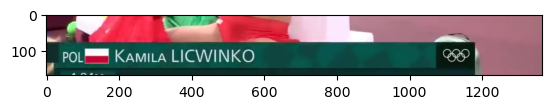

In [ ]:
templateLondon = cv2.imread('helperImages/template1.jpg', cv2.IMREAD_GRAYSCALE)
templateResLondon = cv2.imread('helperImages/template2.png', cv2.IMREAD_GRAYSCALE)
extract_from_video("video/Women's_High_Jump_Final_Tokyo_Replays.mp4","Women's_High_Jump_Final_Tokyo_Replays",templateLondon,templateResLondon)